In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Open the csv file as a dataframe
df1 = pd.read_csv('train_labels.csv')
df2 = pd.read_csv('train_values.csv')
df3 = pd.read_csv('test_values.csv')

In [ ]:
df1

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [ ]:
df2

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.merge(df1, df2, on='building_id')

In [ ]:
print(df.columns)

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has

In [ ]:
df.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

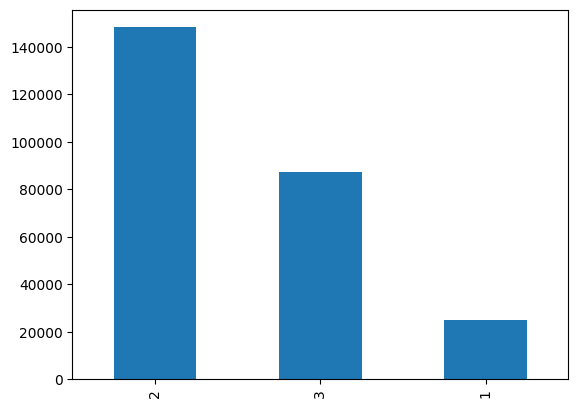

In [ ]:
df['damage_grade'].value_counts().plot(kind='bar')

<Figure size 800x600 with 0 Axes>

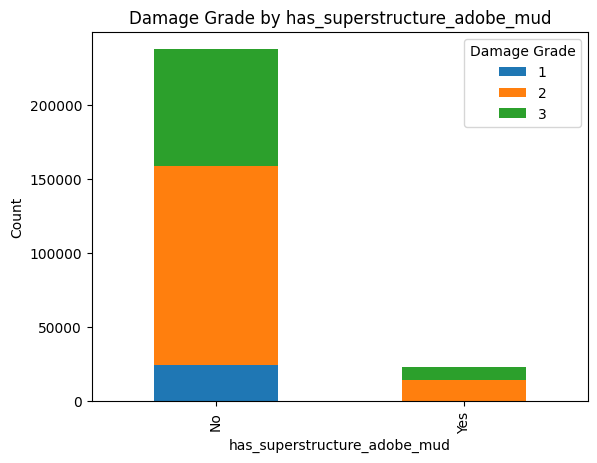

<Figure size 800x600 with 0 Axes>

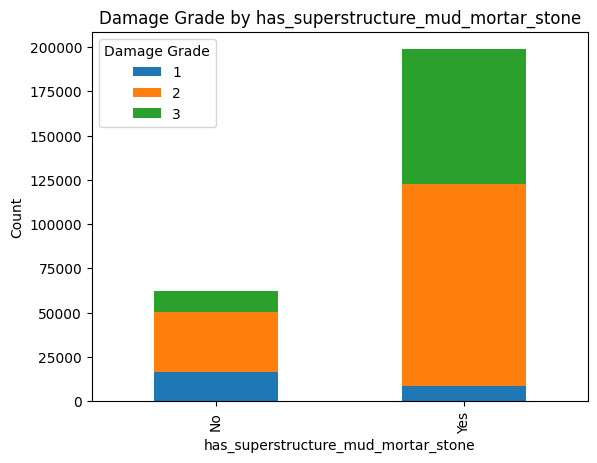

<Figure size 800x600 with 0 Axes>

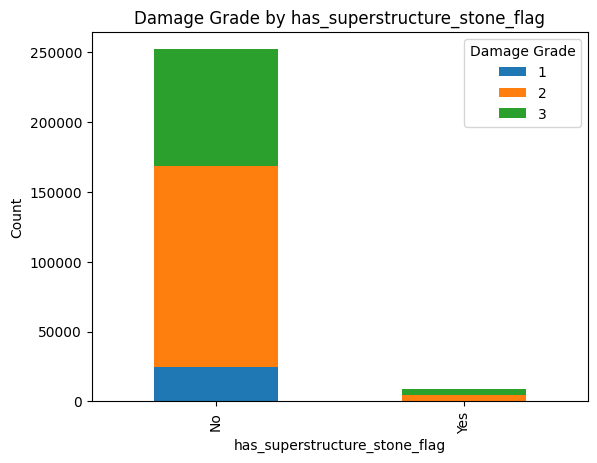

<Figure size 800x600 with 0 Axes>

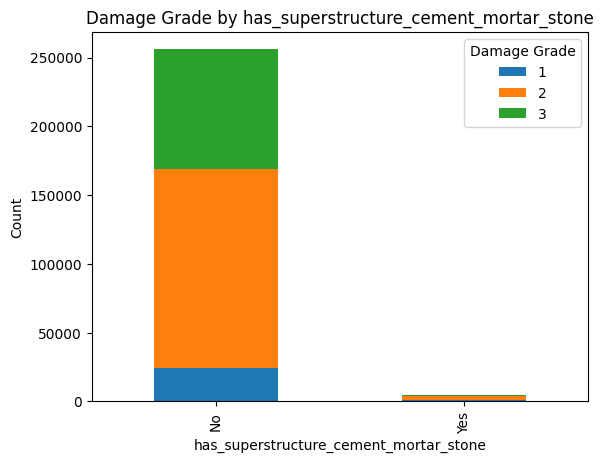

<Figure size 800x600 with 0 Axes>

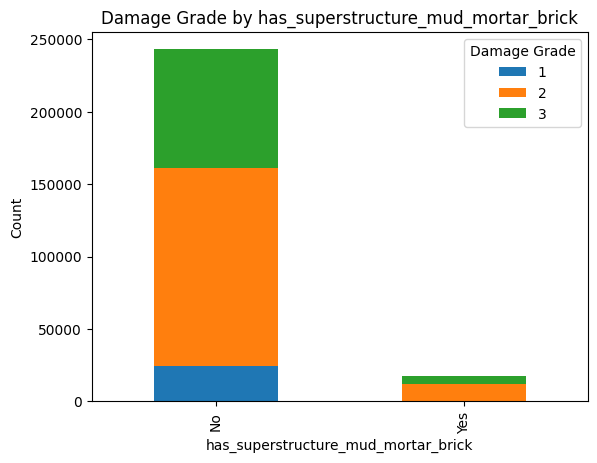

<Figure size 800x600 with 0 Axes>

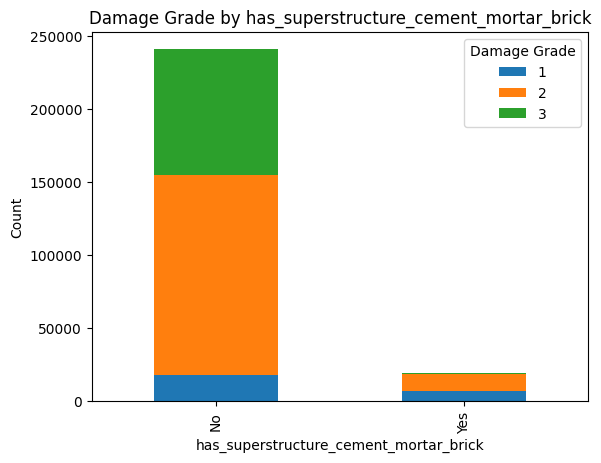

<Figure size 800x600 with 0 Axes>

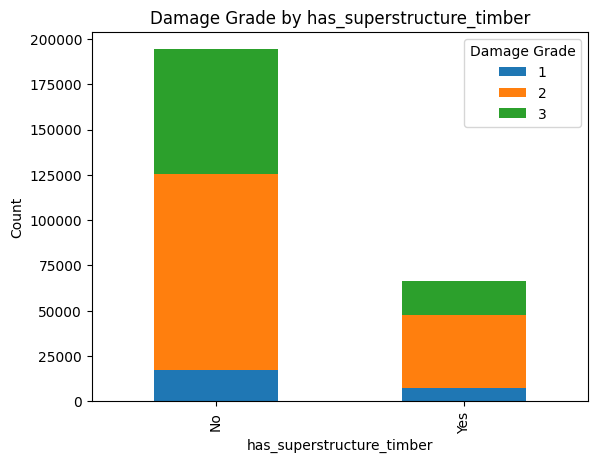

<Figure size 800x600 with 0 Axes>

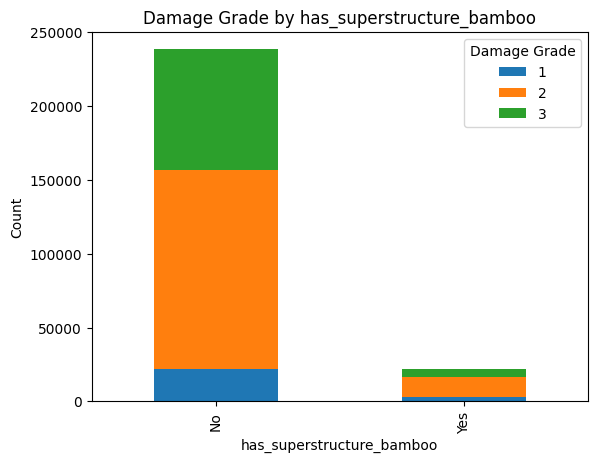

<Figure size 800x600 with 0 Axes>

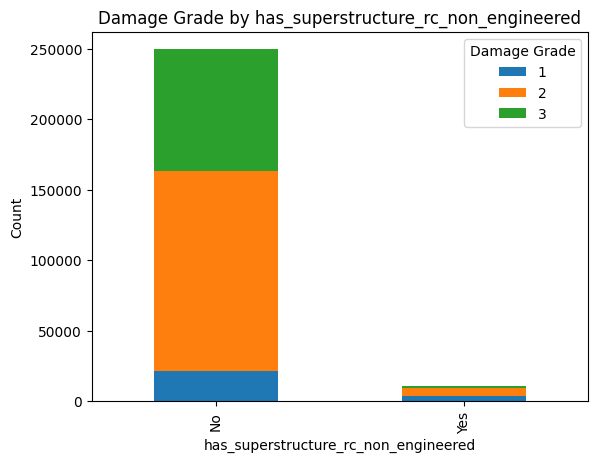

<Figure size 800x600 with 0 Axes>

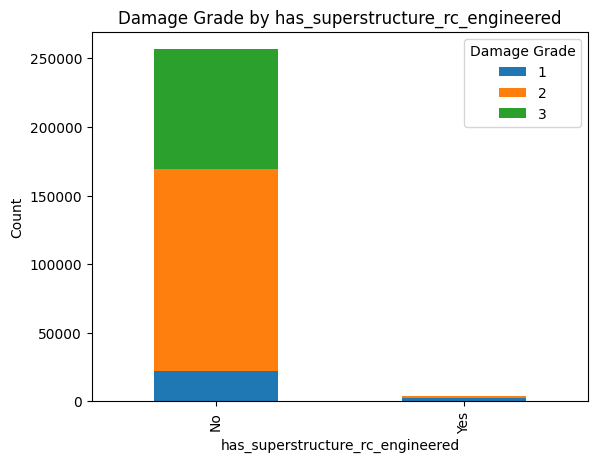

<Figure size 800x600 with 0 Axes>

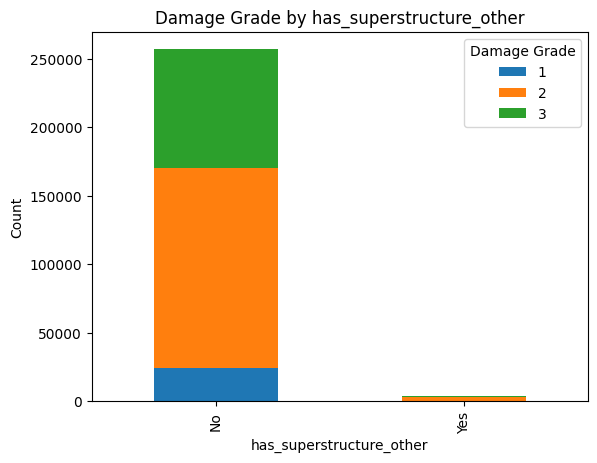

<Figure size 800x600 with 0 Axes>

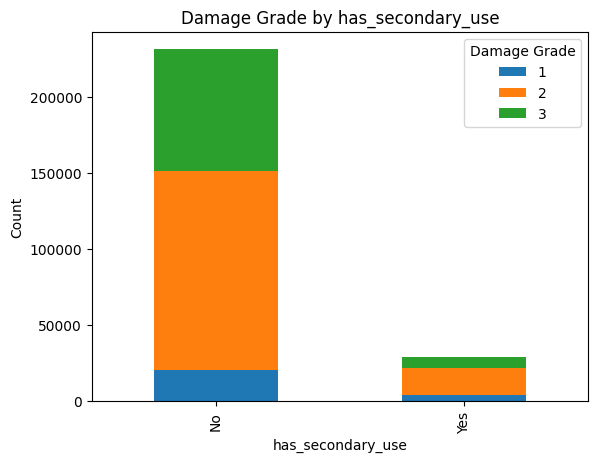

<Figure size 800x600 with 0 Axes>

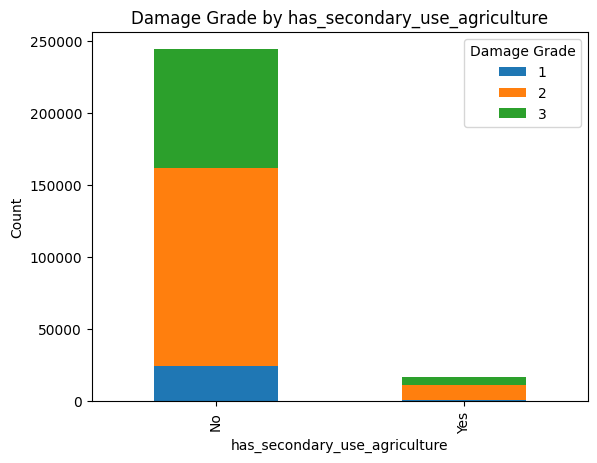

<Figure size 800x600 with 0 Axes>

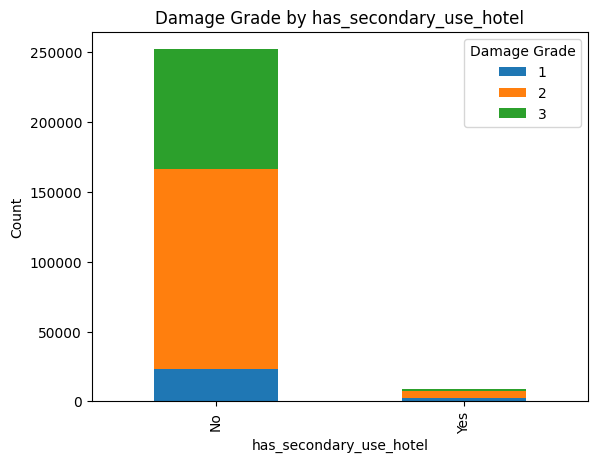

<Figure size 800x600 with 0 Axes>

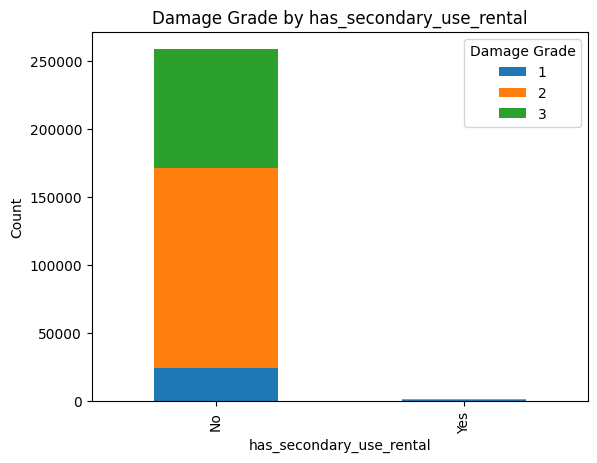

<Figure size 800x600 with 0 Axes>

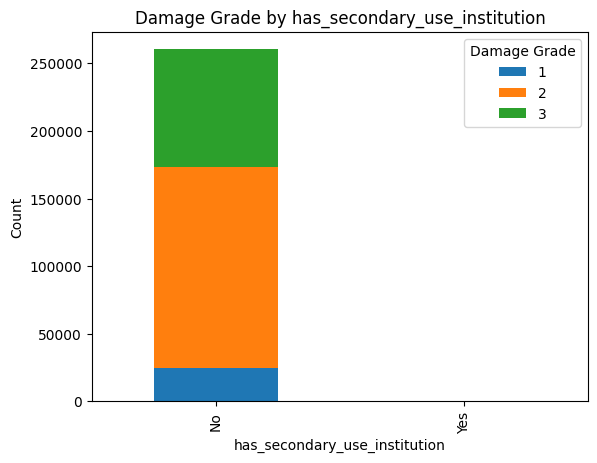

<Figure size 800x600 with 0 Axes>

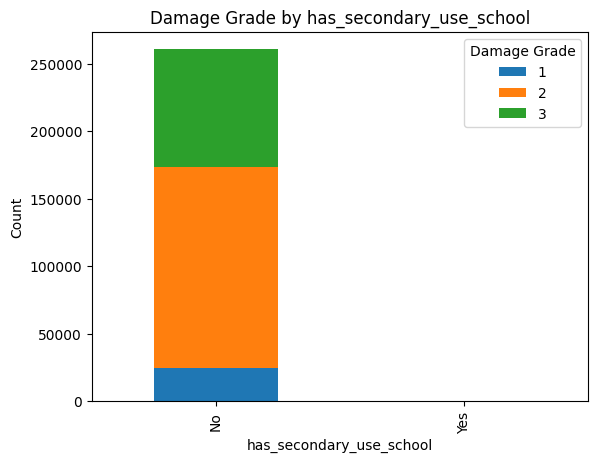

<Figure size 800x600 with 0 Axes>

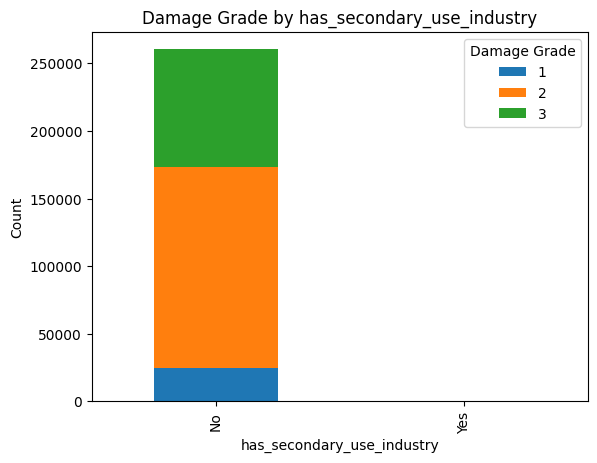

<Figure size 800x600 with 0 Axes>

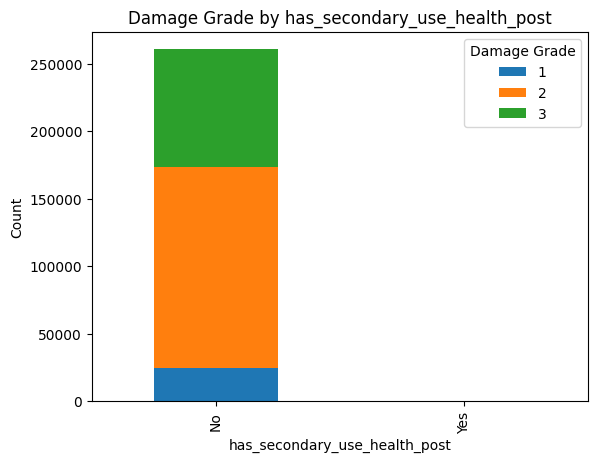

<Figure size 800x600 with 0 Axes>

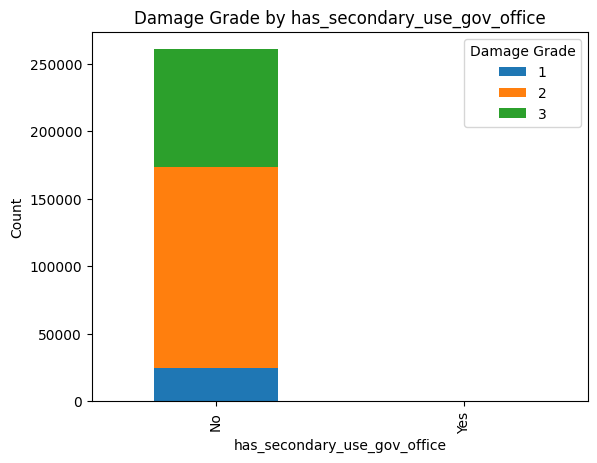

<Figure size 800x600 with 0 Axes>

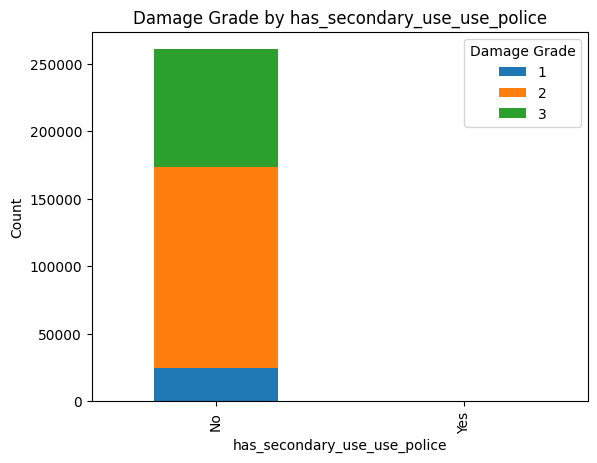

<Figure size 800x600 with 0 Axes>

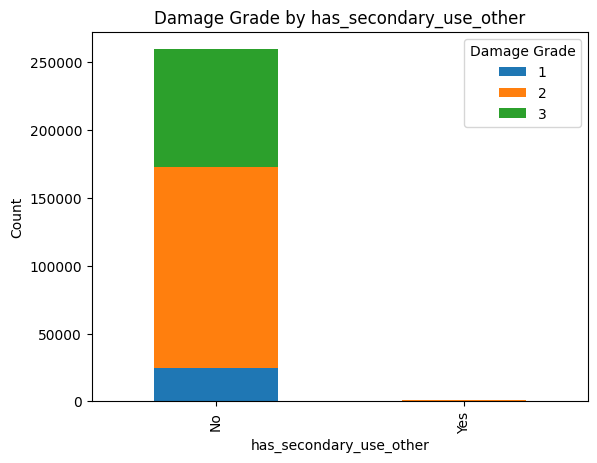

In [ ]:
for col in [col for col in df.columns if 'has' in col]:
    plt.figure(figsize=(8, 6))
    df.groupby([col, 'damage_grade']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Damage Grade by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.legend(title='Damage Grade', labels=[1, 2, 3])
    plt.show()

In [ ]:
df.dtypes

building_id                                int64
damage_grade                               int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_m

In [ ]:
binary_features = df.select_dtypes(include=['float64']).columns
numerical_features = df.select_dtypes(include=['int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [ ]:
df[categorical_features].nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

In [ ]:
df.isnull().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

In [ ]:
df = df.dropna()

In [ ]:
for column in categorical_features:
  print(df[column].value_counts())



t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64
v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64


In [ ]:
print(df['damage_grade'].value_counts())

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


In [ ]:
columns_to_remove =[ "legal_ownership_status",
                    "plan_configuration",
                     "roof_type",
                     "other_floor_type",
                     "building_id"
                     ]

In [ ]:
df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
df

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,2,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,3,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,3,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,2,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
###REMOVE HAS COLUMNS###
df = df.loc[:, ~df.columns.str.contains('has')]

In [ ]:
categorical_features_filtered = [feature for feature in categorical_features if feature not in columns_to_remove]

In [ ]:
df_update = pd.get_dummies(df, columns=categorical_features_filtered )

In [ ]:
features = [col for col in df_update.columns if col != "damage_grade"]
target = "damage_grade"

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(df_update[features])

In [ ]:
df_normalized = pd.DataFrame(X_normalized, columns=features)

In [ ]:
df_normalized["damage_grade"] = df_update["damage_grade"]

In [ ]:
X_train=df_normalized[features]
y_train=df_normalized[target]

In [ ]:
X_train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_n,land_surface_condition_o,...,foundation_type_w,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,position_j,position_o,position_s,position_t
0,0.200000,0.341275,0.970637,0.125,0.030151,0.050505,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.266667,0.630694,0.223761,0.125,0.010050,0.070707,0.166667,0.111111,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.700000,0.254380,0.714013,0.125,0.010050,0.040404,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.733333,0.292922,0.850959,0.125,0.010050,0.050505,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.366667,0.091801,0.118405,0.250,0.030151,0.070707,0.233333,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.833333,0.935529,0.128989,0.000,0.055276,0.050505,0.033333,0.111111,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260597,0.566667,0.501051,0.163921,0.125,0.000000,0.050505,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260598,0.566667,0.035739,0.649558,0.250,0.055276,0.050505,0.166667,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260599,0.866667,0.027330,0.147291,0.125,0.010050,0.131313,0.133333,0.111111,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
test = pd.get_dummies(df3, columns=categorical_features_filtered )

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
Y_normalized = scaler.fit_transform(test[features])

In [ ]:
Y_normalized = pd.DataFrame(Y_normalized, columns=features)

In [ ]:
predictions = model.predict(Y_normalized)

In [ ]:
predictions

array([2, 2, 3, ..., 2, 3, 2])

In [ ]:
df3_pred = df3

In [ ]:
df3_pred["Predictions"] = predictions

In [ ]:
df3_pred

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,Predictions
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,2
1,99355,6,141,11987,2,25,13,5,t,r,...,0,0,0,0,0,0,0,0,0,2
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,745817,26,39,633,1,0,19,3,t,r,...,0,1,0,0,0,0,0,0,0,2
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,0,0,0,0,0,0,0,0,0,1
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,2
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,2
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
submission = pd.DataFrame()
submission["building_id"] = df3_pred["building_id"]
submission["damage_grade"] = df3_pred["Predictions"]

In [ ]:
submission

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,3
3,745817,2
4,421793,3
...,...,...
86863,310028,1
86864,663567,2
86865,1049160,2
86866,442785,3


In [ ]:
submission.to_csv('/content/submission.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train.to_csv('/content/drive/My Drive/X_train.csv', index=False)
y_train.to_csv('/content/drive/My Drive/y_train.csv', index=False)
Y_normalized.to_csv('/content/drive/My Drive/test_features.csv', index=False)

In [ ]:
X_train.to_csv('/content/drive/My Drive/X_train_nohas.csv', index=False)
y_train.to_csv('/content/drive/My Drive/y_train_nohas.csv', index=False)
Y_normalized.to_csv('/content/drive/My Drive/test_features_nohas.csv', index=False)

### TRAIN AND TEST ZONE

In [ ]:
#Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
#SVM = SVC()
KNN = KNeighborsClassifier()
NB = GaussianNB()
GB = GradientBoostingClassifier()
#XGBoost =  XGBClassifier()
LGBM = LGBMClassifier()


In [ ]:
print(f"Fitting ..")
LR.fit(X_train, y_train)
print(f"LR fitted.\n")

print(f"Fitting ..")
DT.fit(X_train, y_train)
print(f"DT fitted.\n")

print(f"Fitting ..")
RF.fit(X_train, y_train)
print(f"RF fitted.\n")

print(f"Fitting ..")
KNN.fit(X_train, y_train)
print(f"KNN fitted.\n")

print(f"Fitting ..")
NB.fit(X_train, y_train)
print(f"NB fitted.\n")

print(f"Fitting ..")
GB.fit(X_train, y_train)
print(f"GB fitted.\n")

print(f"Fitting ..")
LGBM.fit(X_train, y_train)
print(f"LGBM fitted.\n")



Fitting ..


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR fitted.

Fitting ..
DT fitted.

Fitting ..
RF fitted.

Fitting ..
KNN fitted.

Fitting ..
NB fitted.

Fitting ..
GB fitted.

Fitting ..
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 104902, number of used features: 45
[LightGBM] [Info] Start training from score -2.343565
[LightGBM] [Info] Start training from score -0.564985
[LightGBM] [Info] Start training from score -1.091696
LGBM fitted.



In [ ]:
logistic_predictions = LR.predict(Y_normalized)
decision_tree_predictions = DT.predict(Y_normalized)
random_forest_predictions = RF.predict(Y_normalized)
#svm_predictions = svm_model.predict(Y_normalized)
knn_predictions = KNN.predict(Y_normalized)
naive_bayes_predictions = NB.predict(Y_normalized)
gradient_boosting_predictions = GB.predict(Y_normalized)
#xgboost_predictions = xgboost_model.predict(Y_normalized)
lightgbm_predictions = LGBM.predict(Y_normalized)

In [ ]:
# Predictions for Logistic Regression
logistic_pred = pd.DataFrame()
logistic_pred["building_id"] = df3_pred["building_id"]
logistic_pred["damage_grade"] = logistic_predictions

# Predictions for Decision Tree
decision_tree_pred = pd.DataFrame()
decision_tree_pred["building_id"] = df3_pred["building_id"]
decision_tree_pred["damage_grade"] = decision_tree_predictions

# Predictions for Random Forest
random_forest_pred = pd.DataFrame()
random_forest_pred["building_id"] = df3_pred["building_id"]
random_forest_pred["damage_grade"] = random_forest_predictions

# Predictions for SVM
#svm_pred = pd.DataFrame()
#svm_pred["building_id"] = df3_pred["building_id"]
#svm_pred["damage-grade"] = svm_predictions

# Predictions for KNN
knn_pred = pd.DataFrame()
knn_pred["building_id"] = df3_pred["building_id"]
knn_pred["damage_grade"] = knn_predictions

# Predictions for Naive Bayes
naive_bayes_pred = pd.DataFrame()
naive_bayes_pred["building_id"] = df3_pred["building_id"]
naive_bayes_pred["damage_grade"] = naive_bayes_predictions

# Predictions for Gradient Boosting
gradient_boosting_pred = pd.DataFrame()
gradient_boosting_pred["building_id"] = df3_pred["building_id"]
gradient_boosting_pred["damage_grade"] = gradient_boosting_predictions

# Predictions for XGBoost
#xgboost_pred = pd.DataFrame()
#xgboost_pred["building_id"] = df3_pred["building_id"]
#xgboost_pred["damage-grade"] = xgboost_predictions

# Predictions for LightGBM
lightgbm_pred = pd.DataFrame()
lightgbm_pred["building_id"] = df3_pred["building_id"]
lightgbm_pred["damage_grade"] = lightgbm_predictions

In [ ]:
logistic_pred.to_csv('/content/drive/My Drive/Submissions/logistic_pred.csv', index=False)
decision_tree_pred.to_csv('/content/drive/My Drive/Submissions/decision_tree_pred.csv', index=False)
random_forest_pred.to_csv('/content/drive/My Drive/Submissions/random_forest_pred.csv', index=False)
knn_pred.to_csv('/content/drive/My Drive/Submissions/knn_pred.csv', index=False)
naive_bayes_pred.to_csv('/content/drive/My Drive/Submissions/naive_bayes_pred.csv', index=False)
gradient_boosting_pred.to_csv('/content/drive/My Drive/Submissions/gradient_boosting_pred.csv', index=False)
lightgbm_pred.to_csv('/content/drive/My Drive/Submissions/lightgbm_pred.csv', index=False)

In [ ]:
svm_predictions = SVM.predict(Y_normalized)

In [ ]:
#Predictions for SVM
svm_pred = pd.DataFrame()
svm_pred["building_id"] = df3_pred["building_id"]
svm_pred["damage-grade"] = svm_predictions

In [ ]:
svm_pred.to_csv('/content/drive/My Drive/Submissions/svm_pred.csv', index=False)

### Neural Network

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
#Open the csv file as a dataframe
X = pd.read_csv('/content/X_train.csv')
y = pd.read_csv('/content/y_train.csv')
Test = pd.read_csv('/content/test_features.csv')

In [ ]:
print(X.shape,y.shape,Test.shape)

(104902, 47) (104902, 1) (86868, 47)


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
y["damage_grade"]=y["damage_grade"]-1

In [ ]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3)
xgb_model.fit(X, y_y)

# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(Test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y_y)

# Make predictions using Random Forest model
rf_preds = rf_model.predict(Test)


<ipython-input-45-49006eac42a2>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, y)


In [ ]:
hybrid_preds = np.round((xgb_preds + rf_preds) / 2).astype(int)

In [ ]:
hybrid_preds

array([2, 1, 1, ..., 1, 1, 0])

In [ ]:
df3 = pd.read_csv('test_values.csv')

In [ ]:
#Predictions for SVM
hybrid = pd.DataFrame()
hybrid["building_id"] = df3["building_id"]
hybrid["damage_grade"] = hybrid_preds

In [ ]:
hybrid["damage_grade"]=hybrid["damage_grade"]+1


In [ ]:
hybrid.to_csv('/content/hybrid.csv', index=False)

### Test for different features

In [ ]:
X_train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_n,land_surface_condition_o,...,foundation_type_w,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,position_j,position_o,position_s,position_t
0,0.200000,0.341275,0.970637,0.125,0.030151,0.050505,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.266667,0.630694,0.223761,0.125,0.010050,0.070707,0.166667,0.111111,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.700000,0.254380,0.714013,0.125,0.010050,0.040404,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.733333,0.292922,0.850959,0.125,0.010050,0.050505,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.366667,0.091801,0.118405,0.250,0.030151,0.070707,0.233333,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.833333,0.935529,0.128989,0.000,0.055276,0.050505,0.033333,0.111111,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260597,0.566667,0.501051,0.163921,0.125,0.000000,0.050505,0.100000,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260598,0.566667,0.035739,0.649558,0.250,0.055276,0.050505,0.166667,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260599,0.866667,0.027330,0.147291,0.125,0.010050,0.131313,0.133333,0.111111,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [ ]:
Y_normalized

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_n,land_surface_condition_o,...,foundation_type_w,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,position_j,position_o,position_s,position_t
0,0.566667,0.417659,0.899737,0.285714,0.020101,0.065934,0.133333,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.200000,0.098809,0.953847,0.142857,0.025126,0.131868,0.100000,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.733333,0.013315,0.799236,0.142857,0.005025,0.032967,0.100000,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.866667,0.027330,0.050370,0.000000,0.000000,0.197802,0.033333,0.250,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.566667,0.202523,0.634201,0.285714,0.015075,0.076923,0.166667,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,0.133333,0.423966,0.288295,0.285714,0.070352,0.208791,0.133333,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86864,0.333333,0.985985,0.947481,0.285714,0.025126,0.054945,0.166667,0.125,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86865,0.733333,0.796076,0.613671,0.000000,0.050251,0.021978,0.033333,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86866,0.200000,0.729502,0.072571,0.142857,0.005025,0.087912,0.100000,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
#SVM = SVC()
KNN = KNeighborsClassifier()
NB = GaussianNB()
GB = GradientBoostingClassifier()
#XGBoost =  XGBClassifier()
LGBM = LGBMClassifier()

In [ ]:
print(f"Fitting ..")
LR.fit(X_train, y_train)
print(f"LR fitted.\n")

print(f"Fitting ..")
DT.fit(X_train, y_train)
print(f"DT fitted.\n")

print(f"Fitting ..")
RF.fit(X_train, y_train)
print(f"RF fitted.\n")

print(f"Fitting ..")
KNN.fit(X_train, y_train)
print(f"KNN fitted.\n")

print(f"Fitting ..")
NB.fit(X_train, y_train)
print(f"NB fitted.\n")

print(f"Fitting ..")
GB.fit(X_train, y_train)
print(f"GB fitted.\n")

print(f"Fitting ..")
LGBM.fit(X_train, y_train)
print(f"LGBM fitted.\n")



Fitting ..


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR fitted.

Fitting ..
DT fitted.

Fitting ..
RF fitted.

Fitting ..
KNN fitted.

Fitting ..
NB fitted.

Fitting ..
GB fitted.

Fitting ..
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 260601, number of used features: 25
[LightGBM] [Info] Start training from score -2.339167
[LightGBM] [Info] Start training from score -0.564030
[LightGBM] [Info] Start training from score -1.094580
LGBM fitted.



In [ ]:
logistic_predictions = LR.predict(Y_normalized)
decision_tree_predictions = DT.predict(Y_normalized)
random_forest_predictions = RF.predict(Y_normalized)
#svm_predictions = svm_model.predict(Y_normalized)
knn_predictions = KNN.predict(Y_normalized)
naive_bayes_predictions = NB.predict(Y_normalized)
gradient_boosting_predictions = GB.predict(Y_normalized)
#xgboost_predictions = xgboost_model.predict(Y_normalized)
lightgbm_predictions = LGBM.predict(Y_normalized)

In [ ]:
# Predictions for Logistic Regression
logistic_pred = pd.DataFrame()
logistic_pred["building_id"] = df3_pred["building_id"]
logistic_pred["damage_grade"] = logistic_predictions

# Predictions for Decision Tree
decision_tree_pred = pd.DataFrame()
decision_tree_pred["building_id"] = df3_pred["building_id"]
decision_tree_pred["damage_grade"] = decision_tree_predictions

# Predictions for Random Forest
random_forest_pred = pd.DataFrame()
random_forest_pred["building_id"] = df3_pred["building_id"]
random_forest_pred["damage_grade"] = random_forest_predictions

# Predictions for SVM
#svm_pred = pd.DataFrame()
#svm_pred["building_id"] = df3_pred["building_id"]
#svm_pred["damage-grade"] = svm_predictions

# Predictions for KNN
knn_pred = pd.DataFrame()
knn_pred["building_id"] = df3_pred["building_id"]
knn_pred["damage_grade"] = knn_predictions

# Predictions for Naive Bayes
naive_bayes_pred = pd.DataFrame()
naive_bayes_pred["building_id"] = df3_pred["building_id"]
naive_bayes_pred["damage_grade"] = naive_bayes_predictions

# Predictions for Gradient Boosting
gradient_boosting_pred = pd.DataFrame()
gradient_boosting_pred["building_id"] = df3_pred["building_id"]
gradient_boosting_pred["damage_grade"] = gradient_boosting_predictions

# Predictions for XGBoost
#xgboost_pred = pd.DataFrame()
#xgboost_pred["building_id"] = df3_pred["building_id"]
#xgboost_pred["damage-grade"] = xgboost_predictions

# Predictions for LightGBM
lightgbm_pred = pd.DataFrame()
lightgbm_pred["building_id"] = df3_pred["building_id"]
lightgbm_pred["damage_grade"] = lightgbm_predictions

In [ ]:
logistic_pred.to_csv('/content/drive/My Drive/Submissions/logistic_pred_nf.csv', index=False)
decision_tree_pred.to_csv('/content/drive/My Drive/Submissions/decision_tree_pred_nf.csv', index=False)
random_forest_pred.to_csv('/content/drive/My Drive/Submissions/random_forest_pred_nf.csv', index=False)
knn_pred.to_csv('/content/drive/My Drive/Submissions/knn_pred_nf.csv', index=False)
naive_bayes_pred.to_csv('/content/drive/My Drive/Submissions/naive_bayes_pred_nf.csv', index=False)
gradient_boosting_pred.to_csv('/content/drive/My Drive/Submissions/gradient_boosting_pred_nf.csv', index=False)
lightgbm_pred.to_csv('/content/drive/My Drive/Submissions/lightgbm_pred_nf.csv', index=False)

### HYBRID

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y = pd.DataFrame()

In [ ]:
y["damage_grade"]=y_train-1

In [ ]:
y

,damage_grade
0,2
1,1
2,2
3,1
4,2
...,...
260596,1
260597,2
260598,2
260599,1


In [ ]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3)
xgb_model.fit(X_train, y)

# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(Y_normalized)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y)

# Make predictions using Random Forest model
rf_preds = rf_model.predict(Y_normalized)

<ipython-input-79-dd845f40eabe>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y)


In [ ]:
import numpy as np

In [ ]:
hybrid_preds = np.round((xgb_preds + rf_preds) / 2).astype(int)
hybrid_preds

array([2, 1, 2, ..., 1, 2, 0])

In [ ]:
hybrid = pd.DataFrame()
hybrid["building_id"] = df3["building_id"]
hybrid["damage_grade"] = hybrid_preds
hybrid["damage_grade"]=hybrid["damage_grade"]+1
hybrid.to_csv('/content/drive/My Drive/Submissions/hybrid_nf.csv', index=False)

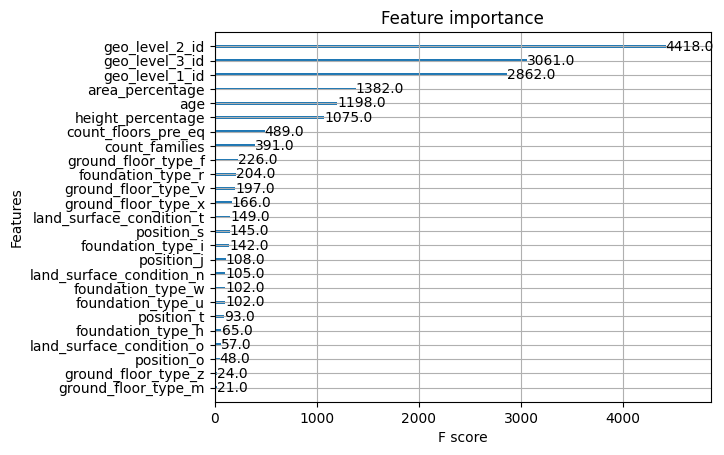

                     Feature  Importance
2             geo_level_3_id    0.202610
1             geo_level_2_id    0.173598
0             geo_level_1_id    0.156278
4                        age    0.130793
5            area_percentage    0.128130
6          height_percentage    0.059625
7             count_families    0.026050
3        count_floors_pre_eq    0.020436
18       ground_floor_type_v    0.017052
13         foundation_type_r    0.016942
12         foundation_type_i    0.008870
16       ground_floor_type_f    0.008556
10  land_surface_condition_t    0.007046
23                position_s    0.006682
15         foundation_type_w    0.006342
8   land_surface_condition_n    0.006288
24                position_t    0.006130
19       ground_floor_type_x    0.004719
21                position_j    0.003841
9   land_surface_condition_o    0.003498
14         foundation_type_u    0.003002
11         foundation_type_h    0.001155
22                position_o    0.001072
20       ground_

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

# Feature importance for Random Forest
rf_feature_importances = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
print(rf_feature_importance_df)

In [ ]:
X_new = X_train.loc[:, ~X_train.columns.str.contains('ground|foundation|land|position')]

In [ ]:
Y_new = Y_normalized.loc[:, ~Y_normalized.columns.str.contains('ground|foundation|land|position')]

In [ ]:
X_new

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
0,0.200000,0.341275,0.970637,0.125,0.030151,0.050505,0.100000,0.111111
1,0.266667,0.630694,0.223761,0.125,0.010050,0.070707,0.166667,0.111111
2,0.700000,0.254380,0.714013,0.125,0.010050,0.040404,0.100000,0.111111
3,0.733333,0.292922,0.850959,0.125,0.010050,0.050505,0.100000,0.111111
4,0.366667,0.091801,0.118405,0.250,0.030151,0.070707,0.233333,0.111111
...,...,...,...,...,...,...,...,...
260596,0.833333,0.935529,0.128989,0.000,0.055276,0.050505,0.033333,0.111111
260597,0.566667,0.501051,0.163921,0.125,0.000000,0.050505,0.100000,0.111111
260598,0.566667,0.035739,0.649558,0.250,0.055276,0.050505,0.166667,0.111111
260599,0.866667,0.027330,0.147291,0.125,0.010050,0.131313,0.133333,0.111111


In [ ]:
y_train

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [ ]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3)
xgb_model.fit(X_new, y)

# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(Y_new)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_new, y)

# Make predictions using Random Forest model
rf_preds = rf_model.predict(Y_new)

hybrid_preds = np.round((xgb_preds + rf_preds) / 2).astype(int)
hybrid_preds

hybrid = pd.DataFrame()
hybrid["building_id"] = df3["building_id"]
hybrid["damage_grade"] = hybrid_preds
hybrid["damage_grade"]=hybrid["damage_grade"]+1
hybrid.to_csv('/content/drive/My Drive/Submissions/hybrid_nf_red.csv', index=False)

<ipython-input-97-51a3fd209efb>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_new, y)
